<a href="https://colab.research.google.com/github/UNB-TME-6017-W24/assignment-1-kingsleygreglo/blob/main/Copy_of_kingsley_Assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

i,

tf.keras.layers.Conv2D:
This layer creates a convolution kernel that is convolved with the layer input to produce a tensor of outputs. for example. If use_bias is True, a bias vector is created and added to the outputs. Finally, if activation is not None, it is applied to the outputs as well. when this layer happes to be the first layer in a model, provide the keyword argument input_shape (tuple of integers or None, does not include the sample axis), e.g. input_shape=(128, 128, 3) for 128x128 RGB pictures in data_format="channels_last". You can use None when a dimension has variable size. further more, this layer performs a 2D convolution operation and used in Convolutional Neural Networks (CNNs) for image processing, classification, and other image-related tasks. This layer filters the input image to learn features like textures edges, and shapes.

Use case: in image processing, it will take an input tensor and applies some convolution filters to it. this will help the model learn to recognize various features in the images. examples of such features are: Key options include filters (number of output filters in the convolution), kernel_size (specifying the height and width of the 2D convolution window), strides, padding (either 'valid' or 'same'), and activation (like 'relu'). You can also set use_bias and provide a kernel_initializer.
Example:
tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1))

ii,

tf.keras.layers.MaxPooling2D.
This layer is used for downsampling the spatial dimensions (width, height) of the input by taking the maximum value over an input window (of size defined by pool_size) for each channel of the input. The window is shifted by strides along each dimension. It helps reduce the computational load, memory usage, and also controls overfitting by providing an abstracted form of the representation.

Use case: It operates on each feature map independently to resize it spatially using the maximum value in each window of size defined by pool_size.
Options available: Key parameters include pool_size (size of the pooling window), strides, and padding. Typically, pool_size is (2, 2).
Example:
tf.keras.layers.MaxPooling2D(pool_size=(2, 2))

iii,

tf.keras.layers.Dropout

The Dropout layer applies Dropout to the input by randomly setting input units to 0 with a frequency of rate at each step during training time, which helps prevent overfitting. Inputs not set to 0 are scaled up by 1/(1 - rate) such that the sum over all inputs is unchanged. Dropout layer only applies when training is set to True such that no values are dropped during inference. When using model.fit, training will be appropriately set to True automatically, and in other contexts, you can set the kwarg explicitly to True when calling the layer. This is in contrast to setting trainable=False for a Dropout layer. trainable does not affect the layer's behavior, as Dropout does not have any variables/weights that can be frozen during training.

Use case: It is used in between dense or convolutional layers. The rate parameter determines the dropout rate.
Options available: The main parameter is rate, which is a float between 0 and 1 and represents the fraction of the input units to drop.
Example:
tf.keras.layers.Dropout(0.5)

iv

tf.keras.layers.Flatten

This layer flattens the input without affecting its batch size. It's used to convert multi-dimensional inputs into a single dimension, which is often required before passing data to a Dense layer.

Use case: Commonly used in CNNs after convolutional and pooling layers to flatten the feature maps.
Options available: It doesn’t have parameters to set except for data_format which is optional.
Example: tf.keras.layers.Flatten()

v,

tf.keras.layers.Dense

Dense layer is a regular densely-connected neural network layer. It's most commonly used layer that finds use in almost all neural networks for different tasks.
Use case: It receives input from all neurons of the previous layer, thus 'densely connected'. It's mainly used for output layers, regression tasks, or intermediate layers.
Options available: Key parameters include units (number of neurons), activation (like 'relu', 'sigmoid', 'softmax'), use_bias, and kernel_initializer.
Example:tf.keras.layers.Dense(units=64, activation='relu')
Each of these layers plays a critical role in building neural network architectures in TensorFlow, particularly for tasks involving image data and deep learning.

In [6]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout,Flatten,Dense

These libraries were impoted to have my libraries loaded and can easily identify challenges

In [7]:
#Loading and Preprocessing the Dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


loading the MNIST dataset and preparing for preprocessing

In [8]:
# Normalize the pixel values of the images to the range [0, 1]
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

In [9]:
# Reshape dataset to have a single channel
x_train = x_train.reshape((x_train.shape[0], 28, 28, 1))
x_test = x_test.reshape((x_test.shape[0], 28, 28, 1))

reshaping the data set

# Convert class vectors to binary class matrices (one-hot encoding)

In [10]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# 3 Build the CNN Model

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense

model = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

# Compilation

In [12]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

#Train and Test the Model
Training:

In [13]:
batch_size = 128
epochs = 10
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_test, y_test))

Epoch 1/10
469/469 [==============================] - 51s 107ms/step - loss: 1.7259 - accuracy: 0.5457 - val_loss: 0.1678 - val_accuracy: 0.9523
Epoch 2/10
469/469 [==============================] - 49s 105ms/step - loss: 0.3584 - accuracy: 0.8936 - val_loss: 0.0880 - val_accuracy: 0.9751
Epoch 3/10
469/469 [==============================] - 49s 105ms/step - loss: 0.2207 - accuracy: 0.9367 - val_loss: 0.0598 - val_accuracy: 0.9820
Epoch 4/10
469/469 [==============================] - 49s 104ms/step - loss: 0.1698 - accuracy: 0.9520 - val_loss: 0.0518 - val_accuracy: 0.9849
Epoch 5/10
469/469 [==============================] - 49s 104ms/step - loss: 0.1422 - accuracy: 0.9592 - val_loss: 0.0453 - val_accuracy: 0.9857
Epoch 6/10
469/469 [==============================] - 50s 106ms/step - loss: 0.1287 - accuracy: 0.9633 - val_loss: 0.0402 - val_accuracy: 0.9867
Epoch 7/10
469/469 [==============================] - 49s 104ms/step - loss: 0.1135 - accuracy: 0.9685 - val_loss: 0.0380 - val_ac

# Evaluation

In [14]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"Test accuracy: {test_accuracy}")

313/313 [==============================] - 2s 8ms/step - loss: 0.0332 - accuracy: 0.9896
Test accuracy: 0.9896000027656555


# 5. Analysis and Reporting
# Plot training & validation accuracy values

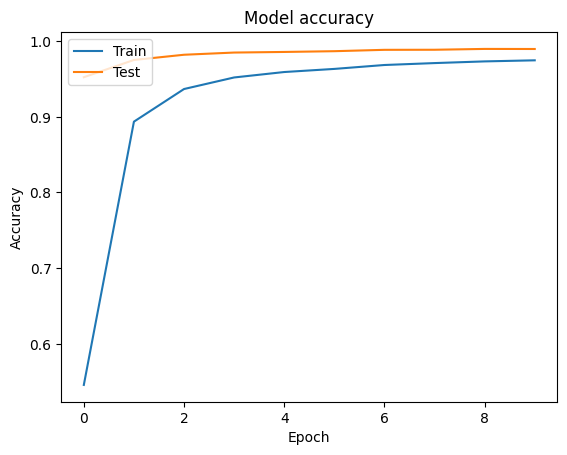

In [15]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


# Plot training & validation loss values

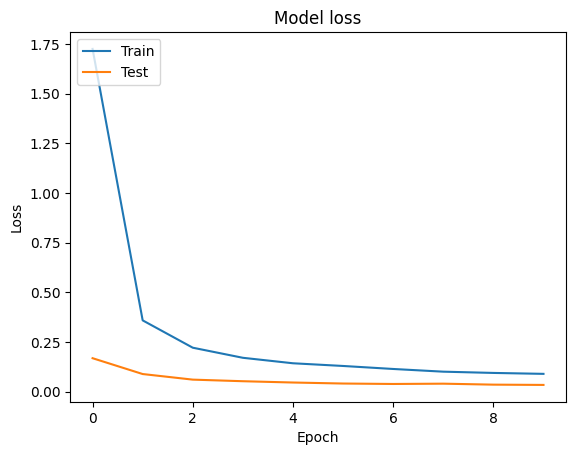

In [16]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()